In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv("superstore_salesData.csv",encoding = "iso-8859-1")
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2.0,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,1/2/2011,1/6/2011,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1.0,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,1/3/2011,1/3/2011,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1.0,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,1/3/2011,1/9/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4.0,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,1/3/2011,1/7/2011,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4.0,0.0,253.320,81.26,High,2011


In [3]:
pd.set_option("display.max_column", None)

In [4]:
df.head(6)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2.0,0.1,15.342,1.80,Medium,2011


In [5]:
df.shape

(51404, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51404 entries, 0 to 51403
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51404 non-null  object 
 1   order_date      51404 non-null  object 
 2   ship_date       51404 non-null  object 
 3   ship_mode       51404 non-null  object 
 4   customer_name   51404 non-null  object 
 5   segment         51404 non-null  object 
 6   state           51404 non-null  object 
 7   country         51404 non-null  object 
 8   market          51404 non-null  object 
 9   region          51404 non-null  object 
 10  product_id      51404 non-null  object 
 11  category        51404 non-null  object 
 12  sub_category    51404 non-null  object 
 13  product_name    51404 non-null  object 
 14  sales           51399 non-null  object 
 15  quantity        51401 non-null  float64
 16  discount        51400 non-null  float64
 17  profit          51401 non-null 

In [7]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             5
quantity          3
discount          4
profit            3
shipping_cost     2
order_priority    0
year              0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.sales = df.sales.apply(lambda x: x.replace(",",""))
df.sales = df.sales.astype(int)

In [10]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,Medium,2011


In [11]:
df["Total_sales"] = df["sales"]*df["quantity"]
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Total_sales
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2.0,0.0,106.140,35.46,Medium,2011,816.0
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,Medium,2011,360.0
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,High,2011,264.0
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,High,2011,135.0
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,Medium,2011,570.0


In [12]:
# plotting individual plot before combining them

In [13]:
sales_df = df.groupby("year")["Total_sales"].sum().reset_index()
profit_df = df.groupby("year")["profit"].sum().reset_index()

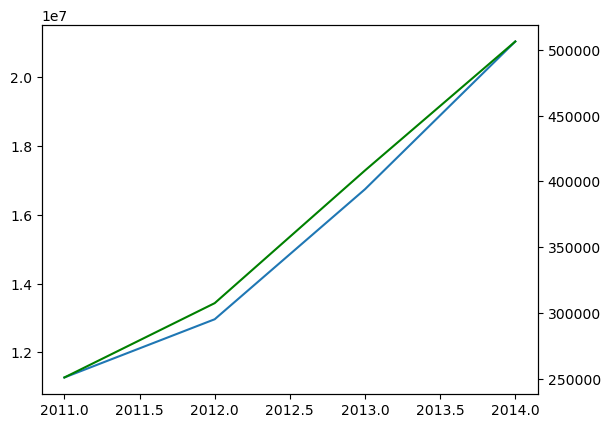

In [14]:
fig, ax1 = plt.subplots()

ax1.plot(sales_df.year, sales_df.Total_sales, label = "total_sales")
ax2 = ax1.twinx()
ax2.plot(profit_df.year, profit_df.profit, label = "profit", color = "green")

In [15]:
region_df = df.groupby("region")["Total_sales"].sum().sort_values(ascending = True).reset_index()

segment_df = df.groupby("segment")["Total_sales"].sum().sort_values(ascending = True).reset_index()

cat_df = df.groupby("category")["Total_sales"].sum().sort_values(ascending = True).reset_index()

subcat_df = df.groupby("sub_category")["Total_sales"].sum().sort_values(ascending = True).reset_index()

ship_df = df.groupby("ship_mode")["shipping_cost"].sum().sort_values(ascending = True).reset_index()

df.order_date =  pd.to_datetime(df.order_date)
newdf = df[["order_date","Total_sales"]]
newdf.set_index("order_date", inplace = True)

month = newdf.index.month
month_df = newdf.groupby(month).mean(numeric_only = True)["Total_sales"].reset_index()

In [16]:
# COMBINING ALL TO A SINGLE DASHBOARD

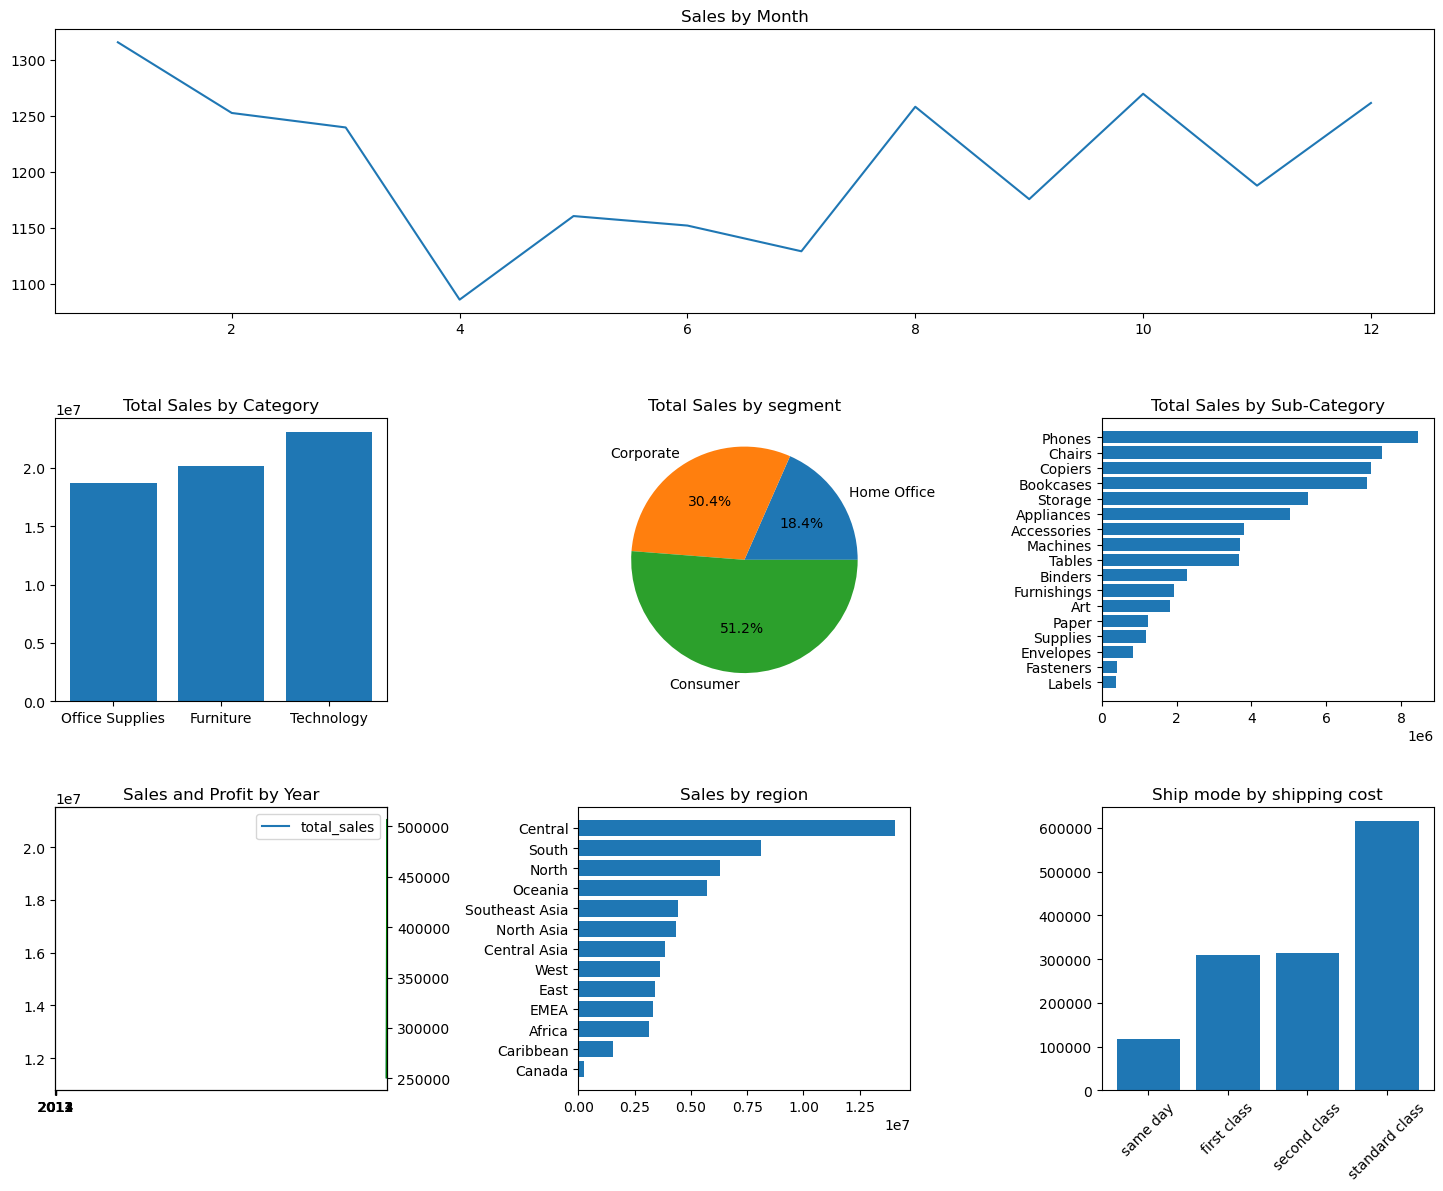

In [21]:
fig = plt.figure(figsize = (25,15))
ax = [None for _ in range(7)]

# creating dashboard canvas
ax[0] = plt.subplot2grid((4,5), (0,0), colspan = 3)
ax[1] = plt.subplot2grid((4,5), (1,0), colspan = 1)
ax[2] = plt.subplot2grid((4,5), (1,1), colspan = 1)
ax[3] = plt.subplot2grid((4,5), (1,2), colspan = 1)
ax[4] = plt.subplot2grid((4,5), (2,0), colspan = 1)
ax[5] = plt.subplot2grid((4,5), (2,1), colspan = 1)
ax[6] = plt.subplot2grid((4,5), (2,2), colspan = 1)

# loading content
ax[0].plot(month_df["order_date"], month_df["Total_sales"])
ax[0].set_title("Sales by Month")

ax[1].bar(cat_df["category"], cat_df["Total_sales"])
ax[1].set_title("Total Sales by Category")

ax[2].pie(segment_df["Total_sales"], labels = segment_df["segment"], autopct = "%1.1f%%")
ax[2].set_title("Total Sales by segment")

ax[3].barh(subcat_df["sub_category"], subcat_df["Total_sales"])
ax[3].set_title("Total Sales by Sub-Category")

ax[4].plot(sales_df.year, sales_df.Total_sales, label = "total_sales", color = "red")
ax2 = ax[4].twinx()
ax2.plot(profit_df.year, profit_df.profit, label = "profit", color = "green")
labels = ["2011","2011","2012","2012","2013","2013", "2014"]
ax[4].set_title("Sales and Profit by Year")
ax[4].set_xticks([0,1,2,3,4,5,6], labels)

ax[4].legend()

ax[5].barh(region_df["region"], region_df["Total_sales"])
ax[5].set_title("Sales by region")

ax[6].bar(ship_df["ship_mode"], ship_df["shipping_cost"])
ax[6].set_title("Ship mode by shipping cost")
labels = ["same day","first class","second class", "standard class"]
ax[6].set_xticks([0,1,2,3], labels,rotation = 45)

plt.tight_layout()
plt.show()

In [ ]:
#fig.savefig("Sales_Dashboard2.png", bbox_inches = "tight")